# Data Cleaning with Obeseity data 

Data cleaning is such an integral part of data analysis.Unlike on Kaggle,almost all data you see in the real world would be dirty and messy. Some even say data cleaning would take 80% of data analysis time.

The very fisrt step of any given data analysis project would be getting to know your data especially when you are dealing a messy one.

So, lets clean this messy data to start our analysis

## Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read and Know Your Data

Take a look at our data as below, the data is quite obscure,it's hard to understand for a human,not mentioned for a computer.in this kind of situation,you have ways to get acquaintance with your data as follows:

1. Go to the data source page [WHO OBESITY DATA](https://apps.who.int/gho/data/node.main.A900A?lang=en)
2. If solution 1 doesn not work or hard to do, you can always go to ask data curator directly.

In [6]:
data = pd.read_csv('../data/data.csv')
data.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


## Why and how the data is messy?

In most cases, data is collected by human or machines,a tiny glich would cause a long strip of bad data.if the data is collected by human, then it is a big chance that it would be messy. data can be dirty in many different ways,but mostly fall into those categories :

1. Missing data : like NAN
2. Validity of data : like 2016.1 / 2016.2 in the column
3. Outliers : like if a BMI entry is greater than 100
4. Consistency of data : the unit of every entry is not the same
5. Correctness of data: we are not gonna go through this ,but it is an important part of doing analysis in bussiness world, basically you need external data source or database to cross check the data in your hand because as we always say:

You dont know what you dont know

6. Data is in wide form not in long form : we are gonna go deeper about this one.

Are you ready, it's time to get our hands dirt

## long form VS wide form

The original data we have here is in wide form which means the form is very wide literally.

The .1 .2 in year number stand for gender, we gonna fix that later.

Wide data is not easy to analyze or stored effectively in computer, so we want to change it as soon as we can. go to read this tidy-data if you want to know more.

![img](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

### Rename the columns appropriately and unpivot the data in the desirable format using pandas melt().

In [16]:
df = data.copy()
df.drop([0,1,2], inplace=True)
df.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [17]:
df.rename(columns={'Unnamed: 0':'country'}, inplace=True)
df.head()

,country,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]
5,Algeria,27.4 [22.5-32.7],19.9 [13.6-27.1],34.9 [27.6-42.7],26.7 [21.9-31.8],19.2 [13.2-26.1],34.2 [27.1-41.7],26.0 [21.4-30.9],18.5 [12.7-25.0],33.6 [26.7-40.7],...,11.8 [6.5-18.6],7.4 [4.3-11.3],3.1 [1.2-6.2],11.4 [6.2-18.4],7.2 [4.1-11.1],2.9 [1.1-6.1],11.1 [5.8-18.2],6.9 [3.9-10.9],2.8 [1.0-6.0],10.7 [5.5-18.0]
6,Andorra,25.6 [20.1-31.3],25.9 [18.0-34.3],25.3 [17.7-33.7],25.4 [20.1-31.0],25.5 [17.8-33.8],25.2 [17.7-33.4],25.2 [20.0-30.7],25.2 [17.6-33.3],25.1 [17.8-33.1],...,17.5 [10.9-25.3],14.0 [9.6-19.1],10.7 [5.6-17.4],16.9 [10.4-24.8],13.5 [9.1-18.6],10.2 [5.2-16.9],16.4 [9.8-24.4],12.9 [8.6-18.1],9.7 [4.7-16.3],15.8 [9.2-23.9]
7,Angola,8.2 [5.1-12.2],4.0 [1.6-7.9],12.1 [6.8-19.0],7.9 [4.9-11.7],3.8 [1.5-7.3],11.6 [6.5-18.2],7.5 [4.7-11.2],3.6 [1.4-6.9],11.1 [6.2-17.5],...,1.6 [0.5-3.7],0.9 [0.3-2.0],0.3 [0.0-0.9],1.5 [0.4-3.6],0.9 [0.3-2.0],0.3 [0.0-0.9],1.4 [0.4-3.5],0.8 [0.3-1.9],0.2 [0.0-0.8],1.4 [0.4-3.4]


In [18]:
df = df.melt(id_vars=['country'], var_name='year')
df.head()

,country,year,value
0,Afghanistan,2016,5.5 [3.4-8.1]
1,Albania,2016,21.7 [17.0-26.7]
2,Algeria,2016,27.4 [22.5-32.7]
3,Andorra,2016,25.6 [20.1-31.3]
4,Angola,2016,8.2 [5.1-12.2]


In [14]:
df[df.country=='India'].head(20)

,country,year,value
81,India,2016,3.9 [3.0-5.0]
279,India,2016.1,2.7 [1.7-4.0]
477,India,2016.2,5.1 [3.6-6.9]
675,India,2015,3.7 [2.9-4.7]
873,India,2015.1,2.6 [1.7-3.7]
1071,India,2015.2,4.8 [3.5-6.5]
1269,India,2014,3.5 [2.7-4.4]
1467,India,2014.1,2.4 [1.6-3.4]
1665,India,2014.2,4.6 [3.3-6.1]
1863,India,2013,3.3 [2.6-4.1]


## Correct the format

1. we will drop the first 3 row since its actually headers in the original forms.
2. correct year value
3. correct the gender value

In [19]:
df.dtypes

country    object
year       object
value      object
dtype: object

In [24]:
df.iloc[1000].year.split('.')

['2015', '2']

In [27]:
df[['year','gender']]  = df.year.str.split('.', expand=True)
df.head()

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],None
1,Albania,2016,21.7 [17.0-26.7],None
2,Algeria,2016,27.4 [22.5-32.7],None
3,Andorra,2016,25.6 [20.1-31.3],None
4,Angola,2016,8.2 [5.1-12.2],None


In [28]:
df.gender.unique()

array([None, '1', '2'], dtype=object)

In [32]:
df['gender'] = df.gender.map({None:'Both', '1': 'Male', '2':'Female'})
df.head()

,country,year,value,gender
0,Afghanistan,2016,5.5 [3.4-8.1],Both
1,Albania,2016,21.7 [17.0-26.7],Both
2,Algeria,2016,27.4 [22.5-32.7],Both
3,Andorra,2016,25.6 [20.1-31.3],Both
4,Angola,2016,8.2 [5.1-12.2],Both


In [35]:
df.iloc[4]

country            Angola
year                 2016
value      8.2 [5.1-12.2]
gender               Both
Name: 4, dtype: object

## correct the BMI value columns

From the webpage of WHO we can know that the values in [] are actually estimation intervel，so we need to seperate them into 3 columns

you can use str.matach() or str.findall() with regular expression to extract float number in this field,but we are gonna use str.split()

In [54]:
pd.DataFrame(df.value.str.findall('\d+\.\d+').tolist()
             #, columns=['BMI','BMI_lower', 'BMI_upper']
            )

#pd.DataFrame(df2.teams.tolist(), index= df2.index)

,0,1,2,3,4,5
0,5.5,3.4,8.1,None,None,None
1,21.7,17.0,26.7,None,None,None
2,27.4,22.5,32.7,None,None,None
3,25.6,20.1,31.3,None,None,None
4,8.2,5.1,12.2,None,None,None
...,...,...,...,...,...,...
24565,13.2,7.1,20.7,None,None,None
24566,0.2,0.1,0.5,None,None,None
24567,4.2,1.5,8.9,None,None,None
24568,2.5,1.0,5.1,None,None,None


In [62]:
df.value.str.findall('\d+\.\d+').apply(len).value_counts()

3    23986
0      504
6       80
Name: value, dtype: int64

504 observations have no data

80 observations have two entries

In [61]:
df[df.value.str.findall('\d+\.\d+').apply(len).ne(3)]

,country,year,value,gender
112,Monaco,2016,No data,Both
149,San Marino,2016,No data,Both
162,South Sudan,2016,No data,Both
165,Sudan,2016,No data,Both
307,Monaco,2016,No data,Male
...,...,...,...,...
24487,Monaco,1975,No data,Female
24524,San Marino,1975,No data,Female
24537,South Sudan,1975,No data,Female
24540,Sudan,1975,No data,Female


In [66]:
df[['BMI','BMI_lower','BMI_upper']] = pd.DataFrame(df.value.str.findall('\d+\.\d+').tolist()).drop(columns=[3,4,5])
df.head()

,country,year,value,gender,BMI,BMI_lower,BMI_upper
0,Afghanistan,2016,5.5 [3.4-8.1],Both,5.5,3.4,8.1
1,Albania,2016,21.7 [17.0-26.7],Both,21.7,17.0,26.7
2,Algeria,2016,27.4 [22.5-32.7],Both,27.4,22.5,32.7
3,Andorra,2016,25.6 [20.1-31.3],Both,25.6,20.1,31.3
4,Angola,2016,8.2 [5.1-12.2],Both,8.2,5.1,12.2


In [68]:
df.shape

(24570, 7)

## Check validity of all columns or fields
We now have a pretty clean data compared to the one we just got. but our job is still not done yet. we need to go through every columns or fields to make sure the data is reletively correct.

**Country columns**

### What we know：

There is a country named country which need to be fixed

There are Nones in country column which need to be fixed

We have

### What we do：

We gonna drop those entries.

In [69]:
df.isna().sum()

country        0
year           0
value          0
gender         0
BMI          504
BMI_lower    504
BMI_upper    504
dtype: int64

In [72]:
df[df.value=='No data']

,country,year,value,gender,BMI,BMI_lower,BMI_upper
112,Monaco,2016,No data,Both,None,None,None
149,San Marino,2016,No data,Both,None,None,None
162,South Sudan,2016,No data,Both,None,None,None
165,Sudan,2016,No data,Both,None,None,None
307,Monaco,2016,No data,Male,None,None,None
...,...,...,...,...,...,...,...
24345,Sudan,1975,No data,Male,None,None,None
24487,Monaco,1975,No data,Female,None,None,None
24524,San Marino,1975,No data,Female,None,None,None
24537,South Sudan,1975,No data,Female,None,None,None


In [71]:
df[df.value=='No data'].country.value_counts()

Monaco         126
San Marino     126
South Sudan    126
Sudan          126
Name: country, dtype: int64

In [73]:
126*4

504

If you missed dropping top 3 rows before melting
```python 
df.dropna(subset=['country'], inplace=True)
```

## BMI \ BMI_upper_esti and BMI_lower_esti columns

### What we know：

1. 4 contries have no BMI data which are Monaca,Sudan,South Sudan and San Marino,hence they dont have estimations.
2. We have 191 countries that do have BMI data and each of them has 126 entries.
3. The descriptive statistics of BMI data seems OK, no outliers.

### What we do：

1. We gonna create a new dataframe without those 4 countries to analyze.
2. We gonna change the data type of BMI and estimations to float.

In [76]:
df.isna().sum()

country        0
year           0
value          0
gender         0
BMI          504
BMI_lower    504
BMI_upper    504
dtype: int64

In [77]:
df.dropna(inplace=True)
df.isna().sum()

country      0
year         0
value        0
gender       0
BMI          0
BMI_lower    0
BMI_upper    0
dtype: int64

In [78]:
df.shape

(24066, 7)

In [79]:
df.dtypes

country      object
year         object
value        object
gender       object
BMI          object
BMI_lower    object
BMI_upper    object
dtype: object

In [80]:
df.drop(columns=['value'], inplace=True)
df['year'] = df.year.astype('int')
df[['BMI','BMI_lower','BMI_upper']] = df[['BMI','BMI_lower','BMI_upper']].astype('float')
df.dtypes

country       object
year           int32
gender        object
BMI          float64
BMI_lower    float64
BMI_upper    float64
dtype: object

In [81]:
df.shape

(24066, 6)

In [82]:
df.head()

,country,year,gender,BMI,BMI_lower,BMI_upper
0,Afghanistan,2016,Both,5.5,3.4,8.1
1,Albania,2016,Both,21.7,17.0,26.7
2,Algeria,2016,Both,27.4,22.5,32.7
3,Andorra,2016,Both,25.6,20.1,31.3
4,Angola,2016,Both,8.2,5.1,12.2


In [83]:
df.describe()

,year,BMI,BMI_lower,BMI_upper
count,24066.00000,24066.000000,24066.000000,24066.000000
mean,1995.50000,12.448932,9.237243,16.232112
std,12.12117,10.407428,8.854281,12.003078
min,1975.00000,0.100000,0.000000,0.200000
25%,1985.00000,3.900000,2.200000,6.300000
50%,1995.50000,10.600000,7.000000,14.800000
75%,2006.00000,18.175000,13.800000,23.000000
max,2016.00000,63.300000,55.600000,70.800000


## Activity (15 minutes)

## Visualization and EDA
Before you doing any EDA, come up with some questions first. Question orientated is always a good way to explore a set of data, you could easily fall into rabbit holes you enconter along the process otherwise.

What question we could possibly answer through this data?

<AxesSubplot:>

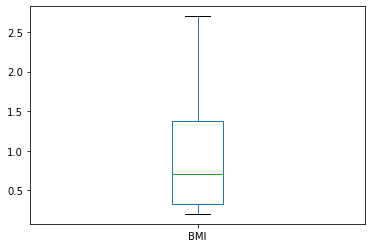

In [89]:
df.loc[(df.gender=='Male')  & (df.country=='India'),'BMI'].plot.box()

<AxesSubplot:title={'center':'Indian females avg. BMI over the last 42 years'}, xlabel='year'>

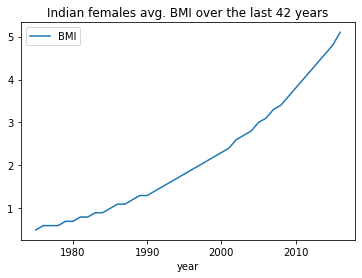

In [95]:
df.loc[(df.gender=='Female')  & (df.country=='India'),['year','BMI']].plot.line(x='year',y='BMI', title='Indian females avg. BMI over the last 42 years')

## list of top 10 countries having obesity (BMI ≥ 30) issues

In [96]:
df.head()

,country,year,gender,BMI,BMI_lower,BMI_upper
0,Afghanistan,2016,Both,5.5,3.4,8.1
1,Albania,2016,Both,21.7,17.0,26.7
2,Algeria,2016,Both,27.4,22.5,32.7
3,Andorra,2016,Both,25.6,20.1,31.3
4,Angola,2016,Both,8.2,5.1,12.2


In [105]:
avg_BMI_per_country_over_the_years = df.loc[df.gender=='Both'].groupby('country').BMI.mean()
avg_BMI_per_country_over_the_years[avg_BMI_per_country_over_the_years.ge(30)].sort_values(ascending=False)

country
Nauru                               53.042857
Palau                               42.080952
Cook Islands                        41.816667
Marshall Islands                    40.454762
Tuvalu                              35.080952
Niue                                34.307143
Tonga                               33.885714
Samoa                               33.659524
Micronesia (Federated States of)    31.995238
Kiribati                            31.204762
Name: BMI, dtype: float64

In [106]:
avg_BMI_per_country_over_the_years['India']

1.5452380952380953

In [116]:
df.year.sort_values().unique()[-5:]

array([2012, 2013, 2014, 2015, 2016])

In [ ]:
df.year.ge(2012)

In [117]:
avg_BMI_per_country_over_last5_years = df.loc[(df.gender=='Both') & (df.year.isin(df.year.sort_values().unique()[-5:]))].groupby('country').BMI.mean()
avg_BMI_per_country_over_last5_years[avg_BMI_per_country_over_last5_years.ge(30)].sort_values(ascending=False)

country
Nauru                               60.32
Cook Islands                        54.86
Palau                               54.22
Marshall Islands                    51.82
Tuvalu                              50.12
Niue                                48.40
Tonga                               46.80
Samoa                               46.02
Kiribati                            44.72
Micronesia (Federated States of)    44.38
Kuwait                              36.78
United States of America            34.92
Jordan                              34.30
Saudi Arabia                        34.08
Qatar                               33.78
Libya                               31.26
Lebanon                             30.84
Turkey                              30.82
Egypt                               30.64
Bahamas                             30.52
United Arab Emirates                30.34
Name: BMI, dtype: float64

In [118]:
avg_BMI_per_country_over_last5_years['India']

3.5

## BMI Trend of a particular country over the years

In [129]:
def bmi_trend(df, some_country = 'New Zealand'): 
    """
    generating BMI trend plot for a given country
    """
    sns.scatterplot(data= df[df.country==some_country] ,
                    x='year',
                    y='BMI',
                    hue='gender'
                   )
    plt.title(f'BMI trend of {some_country} from {df.year.min()}-{df.year.max()}')
    plt.show()

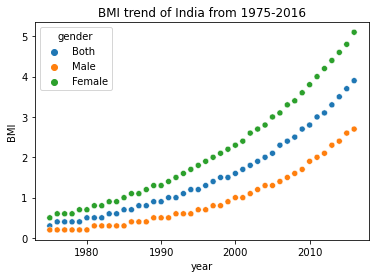

In [130]:
bmi_trend(df, some_country='India')

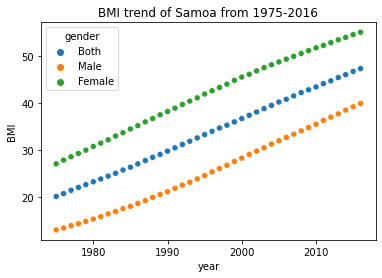

In [131]:
bmi_trend(df, some_country='Samoa')

## Try [bar_chart_race](https://github.com/dexplo/bar_chart_race)

In [132]:
!pip install bar_chart_race

In [155]:
!conda install -c conda-forge ffmpeg -y

Solving environment: ...working... done

# All requested packages already installed.



In [160]:
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

In [139]:
df_wide = df.loc[df.gender=='Both'].pivot(index='year',columns='country',values='BMI')
df_wide.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1975,0.5,6.5,6.9,12.9,0.8,5.6,11.2,7.3,10.5,7.2,...,0.9,11.9,11.4,4.4,5.6,9.6,0.1,2.8,1.5,3.7
1976,0.5,6.7,7.2,13.5,0.9,5.8,11.5,7.6,10.8,7.3,...,0.9,12.2,11.7,4.6,5.8,9.9,0.1,2.9,1.6,3.9
1977,0.6,6.8,7.4,14.0,0.9,6.0,11.8,7.9,11.0,7.5,...,1.0,12.6,11.9,4.8,6.1,10.3,0.2,3.1,1.7,4.0
1978,0.6,7.0,7.7,14.5,1.0,6.2,12.1,8.1,11.3,7.7,...,1.1,13.0,12.2,5.0,6.3,10.7,0.2,3.3,1.9,4.2
1979,0.6,7.2,8.0,15.0,1.1,6.4,12.5,8.4,11.6,7.9,...,1.2,13.3,12.5,5.2,6.6,11.0,0.2,3.4,2.0,4.4


In [178]:
bcr.bar_chart_race(
        df=df_wide, 
        filename=None, 
        sort='desc', 
        steps_per_period=1, 
        title='BMI by Country', 
        n_bars=20,
        figsize=(5,4),
        bar_kwargs={'alpha': .7},
) 